In [34]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import metrics
import warnings

# from sklearn import datasets
# # Import train_test_split function
# from sklearn.model_selection import train_test_split
# #Import scikit-learn metrics module for accuracy calculation

In [35]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [36]:
filepath = "/content/gdrive/MyDrive/ColabNotebooks/iot23_combined12-4b.csv"

In [37]:
df = pd.read_csv(filepath)

In [38]:
del df['Unnamed: 0']

In [39]:
df

,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_udp,conn_state_RSTO,conn_state_RSTR,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF
0,2.998796,0.0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,0,0,0,0,0,0,0
1,2.998804,0.0,0.0,3.0,180.0,0.0,0.0,Benign,0,0,0,0,0,0,0
2,2.999300,0.0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,0,0,0,0,0,0,0
3,2.993548,0.0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,0,0,0,0,0,0,0
4,2.998807,0.0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993282,90.034713,3300.0,0.0,11.0,3608.0,0.0,0.0,Benign,1,0,0,0,0,0,0
1993283,90.399970,340.0,0.0,9.0,844.0,0.0,0.0,Benign,0,0,0,0,0,0,0
1993284,89.824030,72.0,0.0,3.0,216.0,0.0,0.0,Benign,0,0,0,0,0,0,0
1993285,45.215915,200.0,0.0,8.0,648.0,0.0,0.0,Benign,0,0,0,0,0,0,0


In [40]:
df['label'].value_counts()

PartOfAHorizontalPortScan     1548914
Benign                         229946
Okiru                          100624
DDoS                           100018
C&C                              6572
Attack                           6375
C&C-HeartBeat                     751
C&C-FileDownload                   46
C&C-Torii                          16
FileDownload                       13
C&C-HeartBeat-FileDownload          8
Okiru-Attack                        3
C&C-Mirai                           1
Name: label, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993287 entries, 0 to 1993286
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   duration         float64
 1   orig_bytes       float64
 2   resp_bytes       float64
 3   orig_pkts        float64
 4   orig_ip_bytes    float64
 5   resp_pkts        float64
 6   resp_ip_bytes    float64
 7   label            object 
 8   proto_udp        int64  
 9   conn_state_RSTO  int64  
 10  conn_state_RSTR  int64  
 11  conn_state_S1    int64  
 12  conn_state_S2    int64  
 13  conn_state_S3    int64  
 14  conn_state_SF    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 228.1+ MB


In [42]:
xgb = XGBClassifier(activation = 'relu', random_state=10, max_depth=10)
# Train Adaboost Classifer

In [43]:
X = df[['duration', 'orig_bytes', 'resp_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_udp', 'conn_state_RSTO', 'conn_state_RSTR', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF']]
Y = df['label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.15)

In [44]:
start = time.time()
print('program start...')
print()

# DT.fit(X_train, Y_train)
model = xgb.fit(X_train, Y_train)
print()

print('prediction:')
y_pred = model.predict(X_test)
# y_pred = DT.predict(X_test)
print(y_pred)
print()

print('Score:')
# score = metrics.accuracy_score(y_test, y_pred)
score = model.score(X_test,Y_test)
print(score)

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...


prediction:
['PartOfAHorizontalPortScan' 'PartOfAHorizontalPortScan'
 'PartOfAHorizontalPortScan' ... 'PartOfAHorizontalPortScan'
 'PartOfAHorizontalPortScan' 'PartOfAHorizontalPortScan']

Score:
0.8925998515020368
program end...

time cost: 
1895.7078831195831 seconds


Feature: 0, Score: 0.02895
Feature: 1, Score: 0.03621
Feature: 2, Score: 0.03168
Feature: 3, Score: 0.37039
Feature: 4, Score: 0.10602
Feature: 5, Score: 0.02839
Feature: 6, Score: 0.00172
Feature: 7, Score: 0.29772
Feature: 8, Score: 0.00091
Feature: 9, Score: 0.00866
Feature: 10, Score: 0.00043
Feature: 11, Score: 0.00052
Feature: 12, Score: 0.08253
Feature: 13, Score: 0.00588


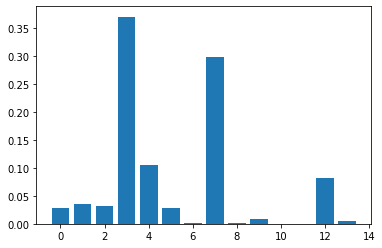

In [47]:
from sklearn.datasets import make_regression
from matplotlib import pyplot

importance = xgb.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [45]:
warnings.filterwarnings('ignore')

In [46]:
print("Classifiction Report :")
print(classification_report(Y_test, y_pred))

Classifiction Report :
                            precision    recall  f1-score   support

                    Attack       1.00      1.00      1.00       926
                    Benign       0.97      0.97      0.97     34242
                       C&C       1.00      0.27      0.42      1019
          C&C-FileDownload       0.50      1.00      0.67         3
             C&C-HeartBeat       0.79      0.42      0.55       101
C&C-HeartBeat-FileDownload       1.00      1.00      1.00         1
                 C&C-Torii       0.00      0.00      0.00         2
                      DDoS       0.33      0.00      0.00     14963
              FileDownload       1.00      1.00      1.00         3
                     Okiru       0.73      0.01      0.01     15209
 PartOfAHorizontalPortScan       0.88      1.00      0.94    232525

                  accuracy                           0.89    298994
                 macro avg       0.75      0.60      0.60    298994
              weighted 